In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:42:06,440 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:06,443 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:06,443 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:06,449 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:42:06,450 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:06,460 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:42:06,832 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:06,836 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:06,836 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:06,837 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:06,837 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:06,838 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:06,838 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:06,839 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:07,246 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:42:07,352 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:07,355 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:07,357 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:07,358 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:07,817 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 2
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136008425132, 864691135865518469, 864691135945413668,
       864691136003930314, 864691136194042326])


--- Working on Neuron 864691136008425132 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 271, # error synapses  = 26, # error presyns = 0
For postsyn: # valid synapses = 3477, # error synapses  = 32, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 271
n_errored_syn_ids_presyn = 26
n_valid_syn_ids_postsyn = 3477
n_errored_syn_ids_postsyn = 32
Segment Id = 864691136008425132
Postsyn counts:
TP:3467
TN:0
FP:10
FN:32
Presyn counts:
TP:24
TN:26
FP:247
FN:0


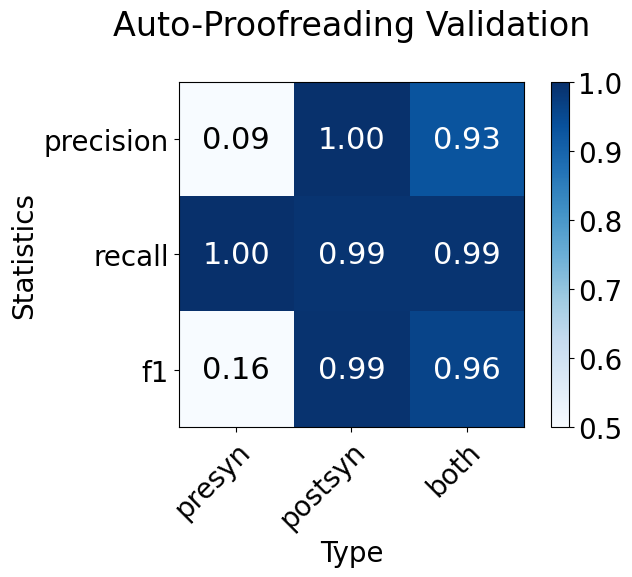

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136008425132_validation_df.pbz2
File size is 0.077137 MB
Total time for neuron 864691136008425132: 298.9249048233032

--- Working on Neuron 864691135865518469 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 89, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 5174, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5263
n_valid_syn_ids_presyn = 89
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 5174
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135865518469
Postsyn counts:
TP:5158
TN:0
FP:16
FN:0
Presyn counts:
TP:10
TN:0
FP:79
FN:0


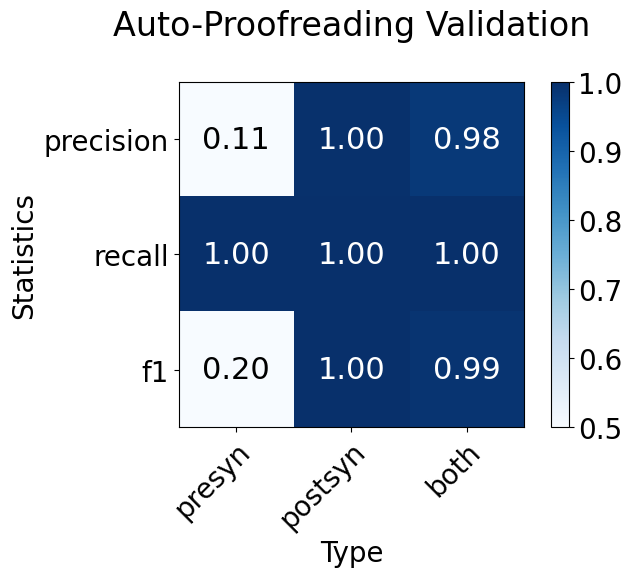

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135865518469_validation_df.pbz2
File size is 0.105502 MB
Total time for neuron 864691135865518469: 90.95978665351868

--- Working on Neuron 864691135945413668 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 108, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1537, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 108
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1537
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135945413668
Postsyn counts:
TP:1536
TN:0
FP:1
FN:0
Presyn counts:
TP:7
TN:0
FP:101
FN:0


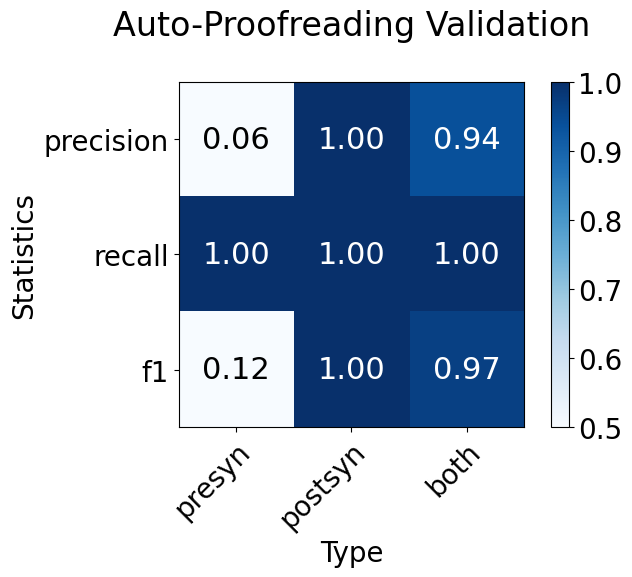

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135945413668_validation_df.pbz2
File size is 0.033835 MB
Total time for neuron 864691135945413668: 30.83597183227539

--- Working on Neuron 864691136003930314 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 121, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3891, # error synapses  = 3, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 121
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 3
Segment Id = 864691136003930314
Postsyn counts:
TP:3879
TN:0
FP:12
FN:3
Presyn counts:
TP:30
TN:0
FP:91
FN:0


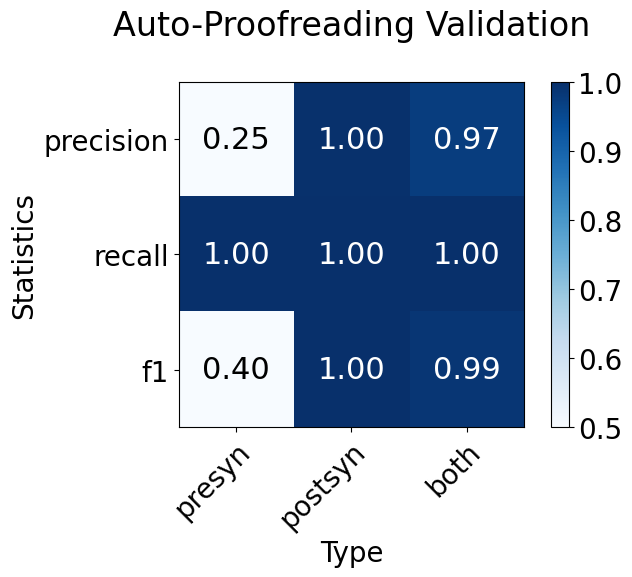

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136003930314_validation_df.pbz2
File size is 0.081118 MB
Total time for neuron 864691136003930314: 74.01771473884583

--- Working on Neuron 864691136194042326 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 421, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3031, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 421
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3031
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136194042326
Postsyn counts:
TP:2999
TN:0
FP:32
FN:0
Presyn counts:
TP:82
TN:0
FP:339
FN:0


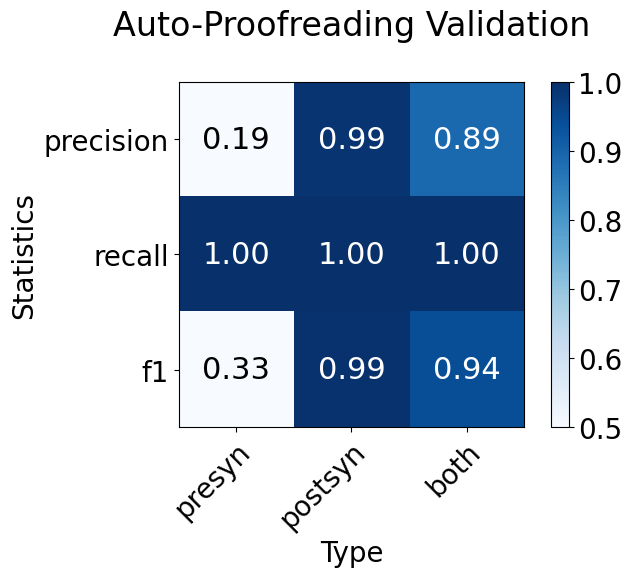

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136194042326_validation_df.pbz2
File size is 0.069538 MB
Total time for neuron 864691136194042326: 72.69934606552124


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")